## GROWTH ANALYSIS OF CROP USING OPTIMIZED MULTILAYER PERCEPTRON

#### IMPORTING RELATED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metric

#### storing the dataset into the dataframe

In [2]:
data = pd.read_csv('crop.csv')


In [3]:
data

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### checking the shape shape of the dataset

In [4]:
data.shape

(2200, 8)

#### Displaying the columns

In [5]:
data.columns

Index(['nitrogen', 'phosphorus', 'potasium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

#### Describing the dataset

In [6]:
data.describe()

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


####  Check the Detailed information of the dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potasium     2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### DATA CLEANING

#### checking the data type of each columns of the dataset

In [8]:
data.dtypes

nitrogen         int64
phosphorus       int64
potasium         int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

#### Display the Null values percentage against every columns (compare to the total number of records)

In [9]:
data.isnull().sum()*100/len(data)

nitrogen       0.0
phosphorus     0.0
potasium       0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

##### droping all the null values from the dataset

In [10]:
crop_data=data.dropna()

In [11]:
crop_data.shape

(2200, 8)

In [12]:
crop_data.isnull()

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


#### Show all the Duplicate rows from the dataframe

In [13]:
crop_data[crop_data.duplicated()]

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall,label


In [14]:
crop_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [15]:
sum(crop_data.duplicated())

0

#### displaying the unique values in nitrogen column

In [16]:
crop_data.nitrogen.unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134], dtype=int64)

#### displaying the unique values in potassium column

In [17]:
crop_data.potasium.sort_values().unique()

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205], dtype=int64)

#### computing the correlation of columns

In [18]:
crop_data.corr()

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall
nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potasium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


#### Analysing our target column

In [19]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [20]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [21]:
crop_data['label'].nunique()

22

In [22]:
var_mod = ['label']
le = LabelEncoder()
for i in var_mod:
    crop_data[i] = le.fit_transform(crop_data[i]).astype(int)

In [23]:
crop_data['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

#### display the top 5 rows of our dataset

In [24]:
crop_data.head()

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


#### display the top 5 rows of our dataset

In [25]:
crop_data.tail()

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,5


### EXPLORATORY DATA ANALYSIS (EDA)

Text(0.5, 1.0, 'Rainfall Range with Count')

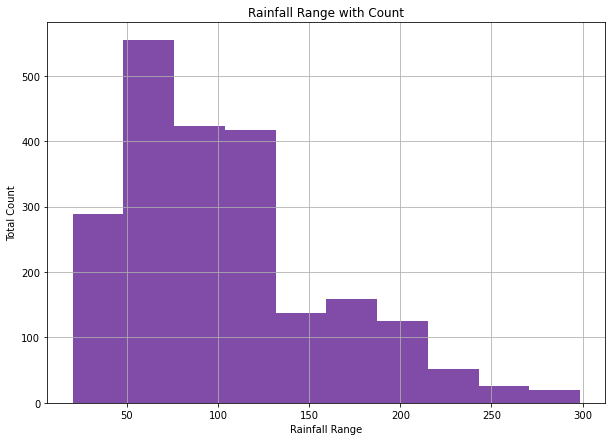

In [26]:
crop_data['rainfall'].hist(figsize=(10,7), color='indigo',alpha =0.7,grid =2,)
plt.xlabel('Rainfall Range')
plt.ylabel('Total Count')
plt.title('Rainfall Range with Count')

Text(0.5, 1.0, 'PH values with Count')

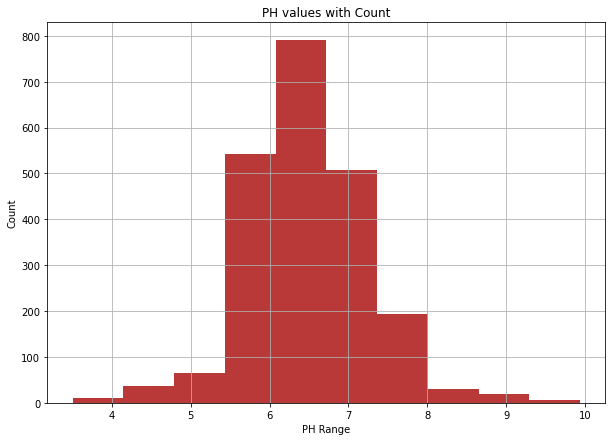

In [27]:
crop_data['ph'].hist(figsize=(10,7), color='firebrick', alpha=0.9)
plt.xlabel('PH Range')
plt.ylabel('Count')
plt.title('PH values with Count')

#### distribution of label column

20    4.55
11    4.55
8     4.55
6     4.55
4     4.55
17    4.55
16    4.55
0     4.55
15    4.55
21    4.55
7     4.55
12    4.55
1     4.55
19    4.55
10    4.55
2     4.55
14    4.55
13    4.55
18    4.55
9     4.55
3     4.55
5     4.55
Name: label, dtype: float64

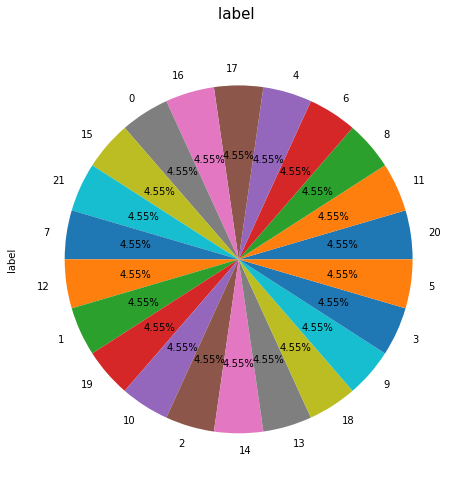

In [28]:
def PropByVar(crop_data, variable):
    dataframe_pie = crop_data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 10,)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/crop_data.shape[0]*100,2)
PropByVar(crop_data, 'label')

#### Heatmap 

<AxesSubplot:>

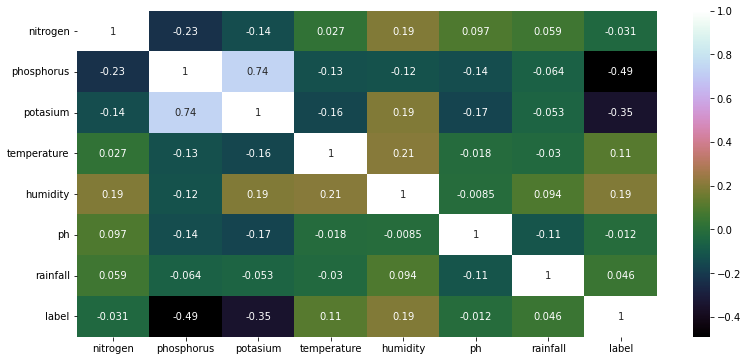

In [29]:
fig, ax = plt.subplots(figsize=(13,6))
sns.heatmap(crop_data.corr(), ax=ax, annot=True, cmap='cubehelix')

#### checking for outliers

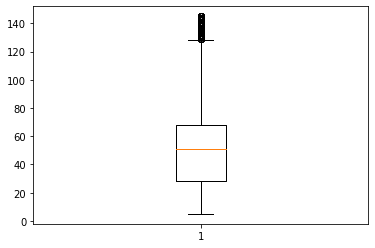

In [30]:
plt.boxplot(crop_data['phosphorus'])
plt.show()

<AxesSubplot:xlabel='nitrogen'>

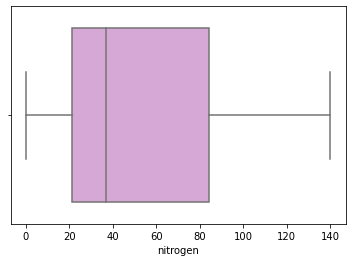

In [31]:
sns.boxplot(crop_data['nitrogen'], color='plum')

#### visualising few feature columns

<AxesSubplot:xlabel='temperature', ylabel='Count'>

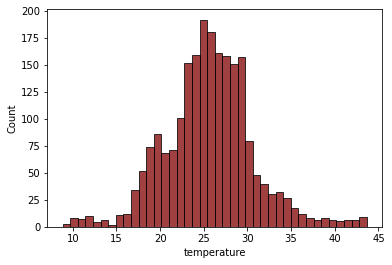

In [32]:
sns.histplot(crop_data['temperature'],color='maroon')

<AxesSubplot:xlabel='humidity'>

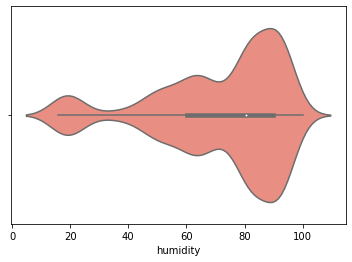

In [33]:
sns.violinplot(crop_data['humidity'],color = 'salmon')

<AxesSubplot:xlabel='potasium', ylabel='Count'>

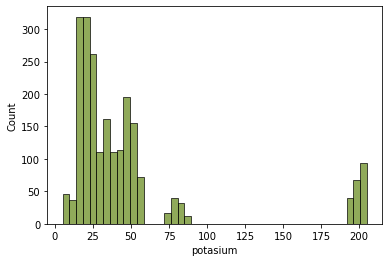

In [34]:
sns.histplot(crop_data['potasium'],color = 'olivedrab')

#### scatter plot of humidity and rainfall

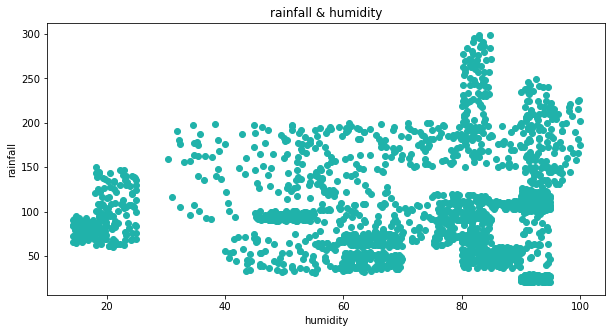

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(crop_data['humidity'],crop_data['rainfall'],color='lightseagreen')
ax.set_xlabel('humidity')
ax.set_ylabel('rainfall')
ax.set_title('rainfall & humidity')
plt.show()

### Splitting the dataset

#### splitting the main data into 2 dataframes
#### 1.) input --- contains all those columns expect the target column
#### 2.) output -- contains only the target column

In [36]:
Input = crop_data.drop(labels='label', axis=1)

In [37]:
Input

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [38]:
output = crop_data.loc[:,'label']

In [39]:
output

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

#### heatmap for Input dataset

<AxesSubplot:>

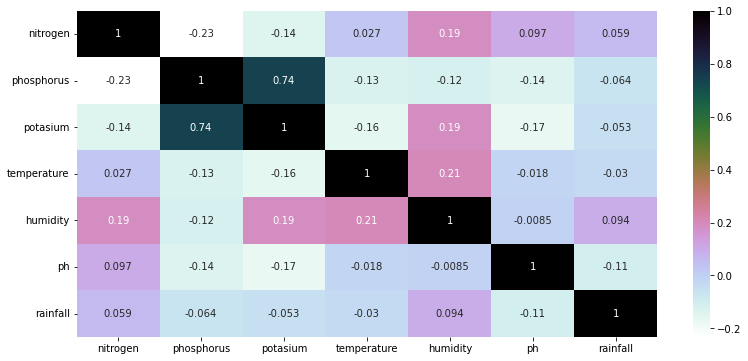

In [40]:
fig, ax = plt.subplots(figsize=(13,6))
sns.heatmap(Input.corr(), ax=ax, annot=True, cmap='cubehelix_r')

### Splitting of Train and the Test Data

####  X is going to hold the source fields and y will be going to hold the target fields 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.3, random_state=1, stratify=output)



#### displaying the x_train,y_train,x_test and y_test dataframes

In [42]:
X_train

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall
940,39,30,38,20.126449,87.596296,6.965157,108.065579
1756,50,46,52,31.182984,90.216469,6.734006,54.018724
1059,117,86,53,25.196402,83.558299,5.703382,115.858608
1105,20,19,35,34.177198,50.621616,6.113935,98.006880
1278,39,129,203,34.389225,83.183928,5.863997,71.030016
...,...,...,...,...,...,...,...
752,37,79,19,27.543848,69.347863,7.143943,69.408782
852,12,58,23,21.746001,63.395032,6.765091,50.433061
2153,120,20,34,23.569605,50.563397,6.906125,130.379712
1562,6,124,200,22.982081,93.845050,5.971332,109.585225


In [43]:
y_train

940     19
1756    17
1059     1
1105    12
1278     7
        ..
752      2
852     10
2153     5
1562     0
422     18
Name: label, Length: 1540, dtype: int32

In [44]:
X_test

,nitrogen,phosphorus,potasium,temperature,humidity,ph,rainfall
539,9,49,16,30.884827,41.365618,7.661537,55.053805
354,23,62,19,16.517835,20.455560,5.609435,98.777942
444,16,73,19,18.416456,34.805410,4.684079,163.274747
1084,104,73,46,29.140092,80.119023,6.282362,90.451429
377,31,75,18,15.467893,21.437807,5.824208,88.887961
...,...,...,...,...,...,...,...
2019,73,45,37,23.704671,74.637454,6.742688,181.278396
2107,89,25,34,23.078954,63.658615,7.184802,129.876544
1818,22,11,29,28.033806,95.016306,5.955743,218.005571
943,38,21,35,20.336911,89.380038,5.841367,110.965314


In [45]:
y_test

539     13
354      9
444     18
1084     1
377      9
        ..
2019     8
2107     5
1818     4
943     19
2143     5
Name: label, Length: 660, dtype: int32

In [46]:
print("Number of Training Dataset: ", len(X_train))

Number of Training Dataset:  1540


In [47]:
print("Number of Testing Dataset: ", len(X_test))

Number of Testing Dataset:  660


In [48]:
print("Total Number of Dataset: ", len(X_train)+len(X_test))

Total Number of Dataset:  2200


### MODELLING

#### COMPARING WITH DIFFERENT MACHINE LEARNING MODELS, AND FINDING OUT THE BEST PREDICTIVE MODEL

1.) DECISION TREE

2.) GAUSSIAN NAIVE BAYES

3.) RANDOM FOREST CLASSIFIER

4.) MULTILAYER PERCEPTRON

5.) ADA BOOST CLASSIFIER

6.) GRADIENTBOOSTING CLASSIFIER

7.) PASSIVE AGRESSIVE CLASSIFIER 

8.) RIDGE CLASSFIER 

9.) VOTING CLASSIFIER


#### 1.) DECISION TREE CLASSIFIER


In [49]:
dt = DecisionTreeClassifier(min_samples_leaf=2, max_depth=10)
dt.fit(X_train,y_train)
predicted_dt = dt.predict(X_test)

In [50]:
Accuracy1 = accuracy_score(y_test,predicted_dt)
print('Accuracy of Decision Tree Classifier is: ',Accuracy1*100)

Accuracy of Decision Tree Classifier is:  98.03030303030303


In [51]:
dta= Accuracy1*100
print(dta)

98.03030303030303


#### Hamming loss

In [52]:
loss = hamming_loss(y_test, predicted_dt)
print('Error is ', loss*100)

Error is  1.9696969696969695


#### Cross-Validation for Decision Tree

In [53]:
cvs_dt = cross_val_score(dt, Input,output)
print(cvs_dt)

[0.98863636 0.94545455 0.98863636 0.97045455 0.96363636]


In [54]:
print(f'Accuracy of Cross Validation Score is {cvs_dt.mean()*100}')

Accuracy of Cross Validation Score is 97.13636363636364


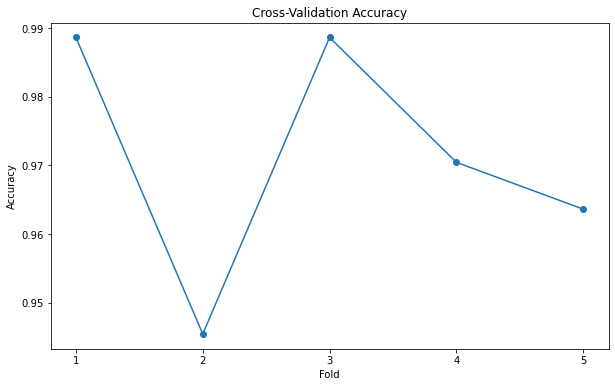

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_dt, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### Classification Report for DT

In [56]:
cr1 = classification_report(y_test,predicted_dt)
print(cr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       0.94      1.00      0.97        30
           5       1.00      0.97      0.98        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.88      1.00      0.94        30
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       1.00      0.93      0.97        30
          14       0.97      1.00      0.98        30
          15       1.00      1.00      1.00        30
          16       1.00      0.90      0.95        30
          17       1.00    

#### Confusion matrix for DT

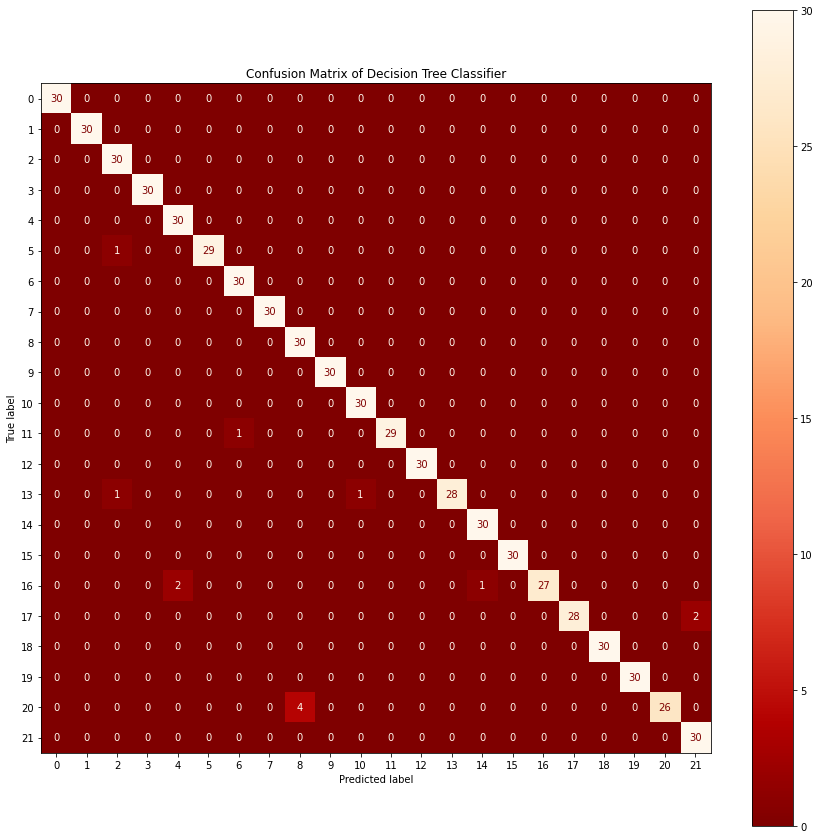

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(dt, X_test, y_test, ax=ax,cmap='OrRd_r')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

#### 2.) GUASSIAN NAIVE BAYES

In [58]:
nb = GaussianNB(var_smoothing=1e-1)
nb.fit(X_train,y_train)
predicted_nb = nb.predict(X_test)

In [59]:
Accuracy2 = accuracy_score(y_test,predicted_nb)
print('Accuracy of Naive Bayes is: ',Accuracy2*100)

Accuracy of Naive Bayes is:  95.45454545454545


In [60]:
nba = Accuracy2*100
print(nba)

95.45454545454545


#### Hamming loss

In [61]:
loss = hamming_loss(y_test, predicted_nb)
print('Error is ', loss*100)

Error is  4.545454545454546


#### Cross-Validation for Gaussian-naive bayes

In [62]:
cvs_nb = cross_val_score(nb, Input,output)
print(cvs_nb)

[0.95227273 0.95681818 0.95681818 0.95681818 0.95454545]


In [63]:
print(f'Accuracy of Cross Validation Score is {cvs_nb.mean()*100}')

Accuracy of Cross Validation Score is 95.54545454545455


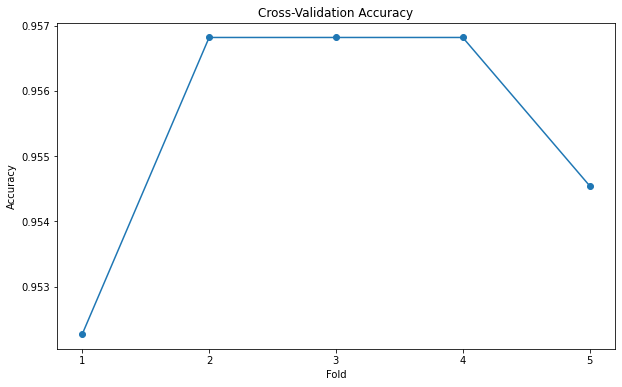

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_nb, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### Classification Report for Naive bayes

In [65]:
cr3 = classification_report(y_test,predicted_nb)
print(cr3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.85      0.93      0.89        30
           3       1.00      1.00      1.00        30
           4       1.00      0.87      0.93        30
           5       1.00      1.00      1.00        30
           6       0.91      1.00      0.95        30
           7       1.00      1.00      1.00        30
           8       0.79      1.00      0.88        30
           9       0.94      1.00      0.97        30
          10       0.91      1.00      0.95        30
          11       1.00      0.83      0.91        30
          12       1.00      1.00      1.00        30
          13       1.00      0.90      0.95        30
          14       0.91      1.00      0.95        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

#### Confusion matrixv for Naive bayes

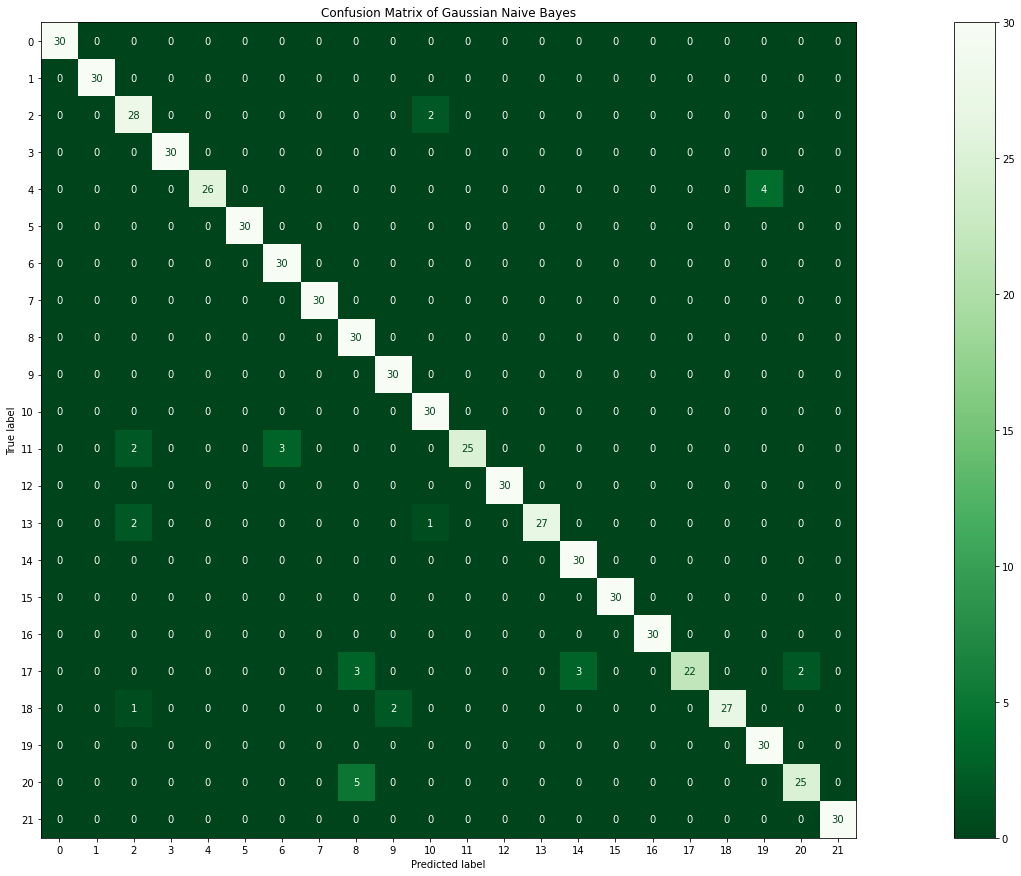

In [66]:
fig, ax = plt.subplots(figsize=(35,15))
plot_confusion_matrix(nb, X_test, y_test, ax=ax,cmap='Greens_r')
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.show()

####  3.) RANDOM FOREST CLASSIFIER

In [67]:
rF = RandomForestClassifier(n_estimators = 1000, random_state = 1,max_leaf_nodes=20,min_samples_leaf=40)

In [68]:
rF.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=20, min_samples_leaf=40,
                       n_estimators=1000, random_state=1)

In [69]:
predicted_rF = rF.predict(X_test)

In [70]:
Accuracy4 = accuracy_score(y_test,predicted_rF)
print('Accuracy of RandomForestClassifier Classifier is: ',Accuracy4*100)

Accuracy of RandomForestClassifier Classifier is:  96.96969696969697


In [71]:
rfa=Accuracy4*100
print(rfa)

96.96969696969697


#### Hamming loss

In [72]:
loss = hamming_loss(y_test, predicted_rF)
print('Error is ', loss*100)

Error is  3.0303030303030303


#### cross-validation for random forest algorithm

In [73]:
cvs_rF = cross_val_score(rF, Input,output)
print(cvs_rF)

[0.98863636 0.97727273 0.98181818 0.98409091 0.96590909]


In [74]:
print(f'Accuracy of Cross Validation Score is {cvs_rF.mean()*100}')

Accuracy of Cross Validation Score is 97.95454545454545


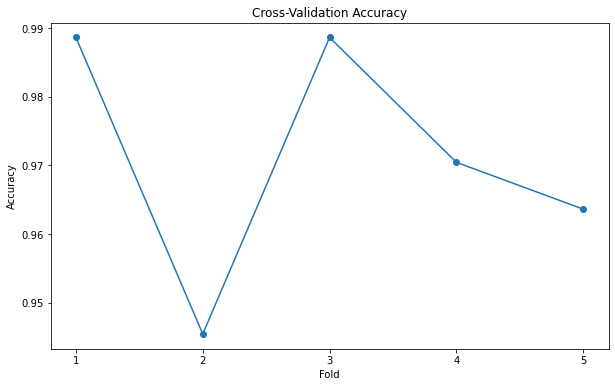

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_dt, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### Classification report for randomforest

In [76]:
cr4 = classification_report(y_test,predicted_rF)
print(cr4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.88      1.00      0.94        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.96      0.77      0.85        30
           9       1.00      1.00      1.00        30
          10       0.85      0.97      0.91        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       0.95      0.70      0.81        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

#### Confusion matrix for Random forest

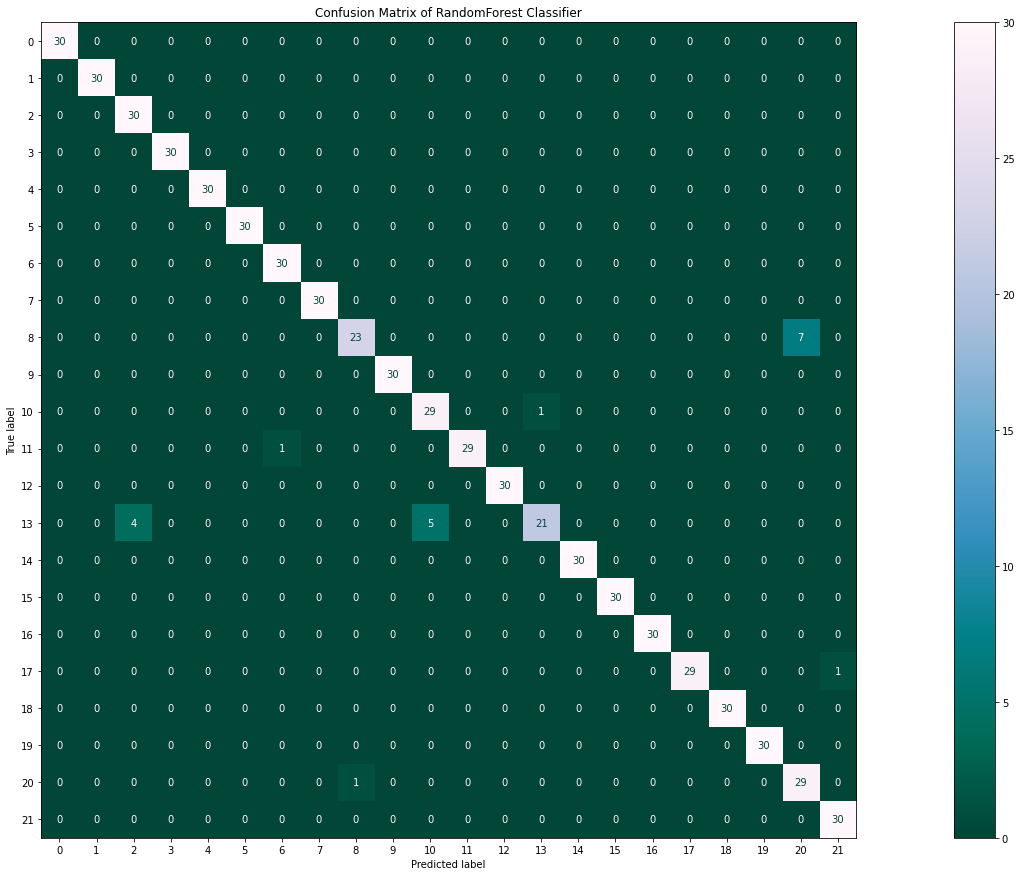

In [77]:
fig, ax = plt.subplots(figsize=(35,15))
plot_confusion_matrix(rF, X_test, y_test, ax=ax,cmap='PuBuGn_r')
plt.title('Confusion Matrix of RandomForest Classifier')
plt.show()

#### 4.) MULTILAYER PERCEPTRON

In [78]:
mlp1 = MLPClassifier(hidden_layer_sizes=(7,5),
                    random_state=84,
                    verbose=False,
                    learning_rate_init=0.01)
mlp1.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(7, 5), learning_rate_init=0.01,
              random_state=84)

In [79]:
predicted_mlp1=mlp1.predict(X_test)

In [80]:
Accuracy_mlp1 = accuracy_score(y_test,predicted_mlp1)
print('Accuracy of Multilayer perceptron is: ',Accuracy_mlp1*100)

Accuracy of Multilayer perceptron is:  91.06060606060606


#### Hamming loss for multilayer perceptron without any optimization

In [81]:
loss = hamming_loss(y_test, predicted_mlp1)
print('Error is ', loss*100)

Error is  8.93939393939394


#### Cross validation Multilayer perceptron without any optimization

In [82]:
cvs_mlp1 = cross_val_score(mlp1, Input,output,cv=5)
print(cvs_mlp1)

[0.63863636 0.62045455 0.53181818 0.67272727 0.67045455]


In [83]:
print(f'Accuracy of Cross Validation Score is {cvs_mlp1.mean()*100}')

Accuracy of Cross Validation Score is 62.68181818181818


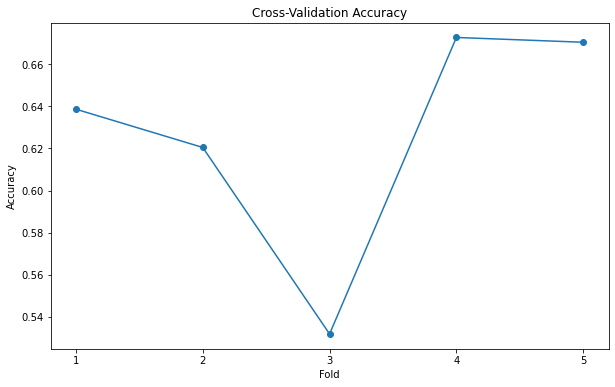

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_mlp1, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()
#In this code, we first define the MLPClassifier with the given hyperparameters. Then, we use the cross_val_score function from sklearn.model_selection to perform k-fold cross-validation with 5 folds (as specified by the cv parameter) on the training data X_train and labels y_train. We calculate the mean accuracy scores across the folds using np.mean, and then plot the cross-validation graph using matplotlib, with the x-axis representing the fold number and the y-axis representing the accuracy at each fold. This graph provides a visual representation of the model's performance during cross-validation, showing how the accuracy changes across different folds, which indicates the model's generalization performance on unseen data.



#### Classification report for Multilayer perceptron

In [85]:
cr_mlp1 = classification_report(y_test,predicted_mlp1)
print(cr_mlp1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.91      1.00      0.95        30
           2       0.88      0.77      0.82        30
           3       1.00      1.00      1.00        30
           4       0.97      0.93      0.95        30
           5       1.00      0.97      0.98        30
           6       0.82      0.93      0.87        30
           7       0.86      1.00      0.92        30
           8       0.72      0.93      0.81        30
           9       0.83      0.97      0.89        30
          10       0.89      0.83      0.86        30
          11       0.96      0.80      0.87        30
          12       1.00      1.00      1.00        30
          13       0.79      0.87      0.83        30
          14       0.88      1.00      0.94        30
          15       0.94      1.00      0.97        30
          16       1.00      1.00      1.00        30
          17       0.86    

#### confusion matrix for MLP without any optimization

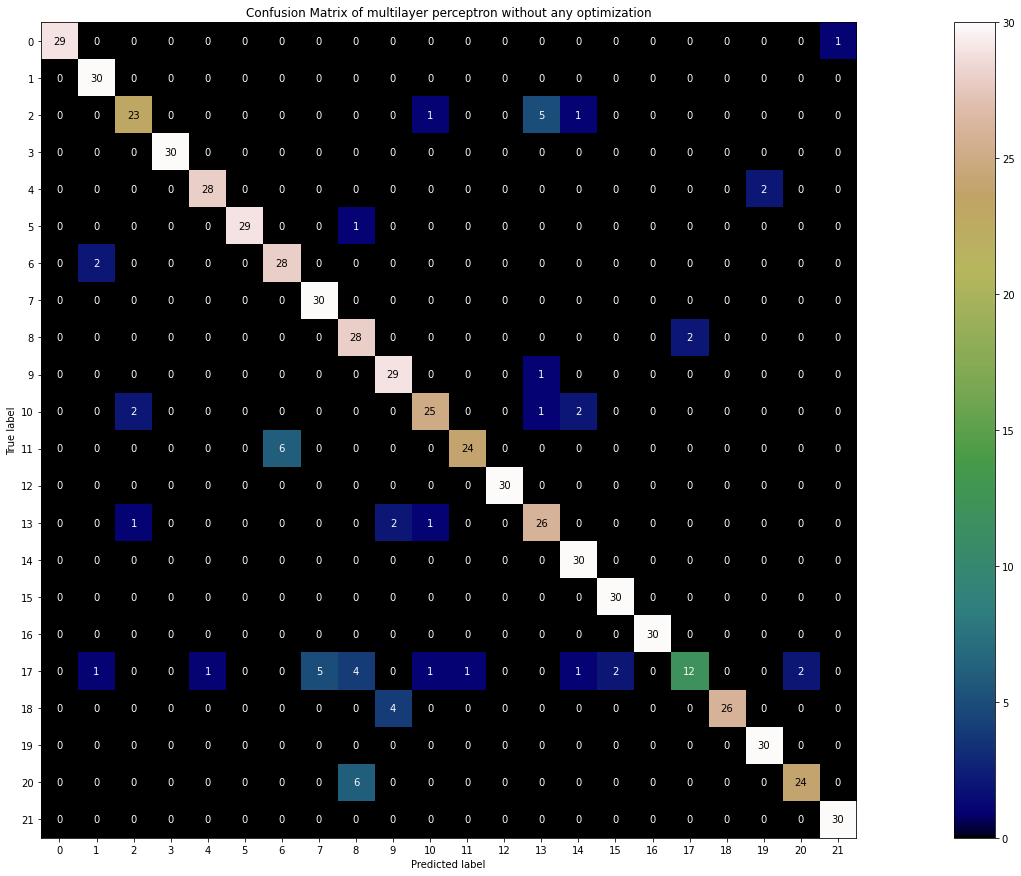

In [86]:
fig, ax = plt.subplots(figsize=(35,15))
plot_confusion_matrix(mlp1, X_test, y_test, ax=ax,cmap ='gist_earth')
plt.title('Confusion Matrix of multilayer perceptron without any optimization')
plt.show()

#### MSE Graph for MLP wiithout optimization

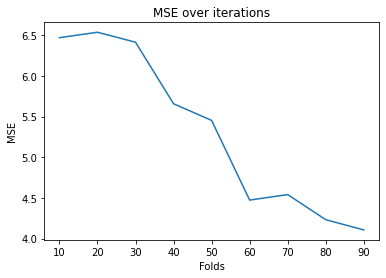

In [87]:
mse_values = []
iterations = []

# Train the model and collect MSE values
for i in range(1, 100):
    mlp1.partial_fit(X_train, y_train, classes=np.unique(y_train))
    if i % 10 == 0:
        # Predict on training set and calculate MSE
        y_pred_train = mlp1.predict(X_train)
        mse = mean_squared_error(y_train, y_pred_train)
        mse_values.append(mse)
        iterations.append(i)

# Plot the MSE values over iterations
plt.plot(iterations, mse_values)
plt.title('MSE over iterations')
plt.xlabel('Folds')
plt.ylabel('MSE')
plt.show()


#### Multilayer perceptron using grid search optimization technique

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(7,5),
                    random_state=84,
                    verbose=False,
                    learning_rate_init=0.01)

parameter_grid = {'hidden_layer_sizes': [(7,5), (10,10), (20,20)],
              'activation': ['relu', 'logistic', 'tanh'],#Rectified Linear Unit returns the value if it is positive or zero,logisic
              'learning_rate_init': [0.001, 0.01, 0.1]}#logistic gives the value between 0 and 1 and used for binary classification

grid_search = GridSearchCV(mlp, parameter_grid, cv=7)#tangent function similar to logistic but maps the value between 1 and -1
#cv is noting but the number of folds

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(7,5),
                    random_state=84,
                    verbose=False,
                    learning_rate_init=0.01)
 parameter_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(7, 5), (10, 10), (20, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.1]})

In [89]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=MLPClassifier(hidden_layer_sizes=(7, 5),
                                     learning_rate_init=0.01, random_state=84),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(7, 5), (10, 10), (20, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.1]})

In [90]:
predicted_mlp=grid_search.predict(X_test)

In [91]:
Accuracy3 = accuracy_score(y_test,predicted_mlp)

In [92]:
print('Accuracy of Multilayer perceptron is: ',Accuracy3*100)


Accuracy of Multilayer perceptron is:  96.06060606060606


In [93]:
mlpa=Accuracy3*100
print(mlpa)

96.06060606060606


#### Hamming loss

In [94]:
loss = hamming_loss(y_test, predicted_mlp)
print('Error is ', loss*100)

Error is  3.939393939393939


#### MSE GRAPH with Optimization

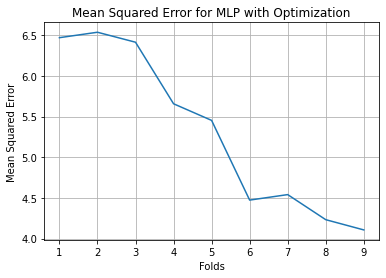

In [95]:
plt.plot(np.arange(1, len(mse_values) + 1), mse_values)
plt.xlabel('Folds')
plt.ylabel('Mean Squared Error')
plt.title(f'Mean Squared Error for MLP with Optimization')
plt.grid(True)
plt.show()



#### cross-validaiton for multilayer perceptron 

In [96]:
cvs_mlp = cross_val_score(rF, Input,output)
print(cvs_mlp)

[0.98863636 0.97727273 0.98181818 0.98409091 0.96590909]


In [97]:
print(f'Accuracy of Cross Validation Score is {cvs_mlp.mean()*100}')

Accuracy of Cross Validation Score is 97.95454545454545


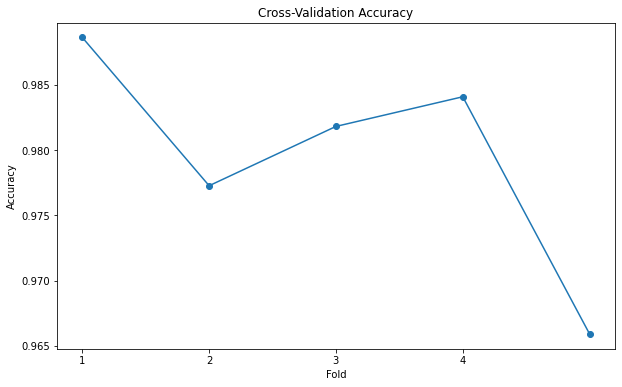

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_rF, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 5))
plt.show()

#### Classification report with optimization

In [105]:
cr2 = classification_report(y_test,predicted_mlp)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.87      0.87      0.87        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.98        30
           6       0.90      0.90      0.90        30
           7       1.00      1.00      1.00        30
           8       0.85      0.93      0.89        30
           9       1.00      1.00      1.00        30
          10       0.93      0.90      0.92        30
          11       0.90      0.90      0.90        30
          12       1.00      1.00      1.00        30
          13       0.82      0.93      0.87        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

#### Confusion matrix with Optimization

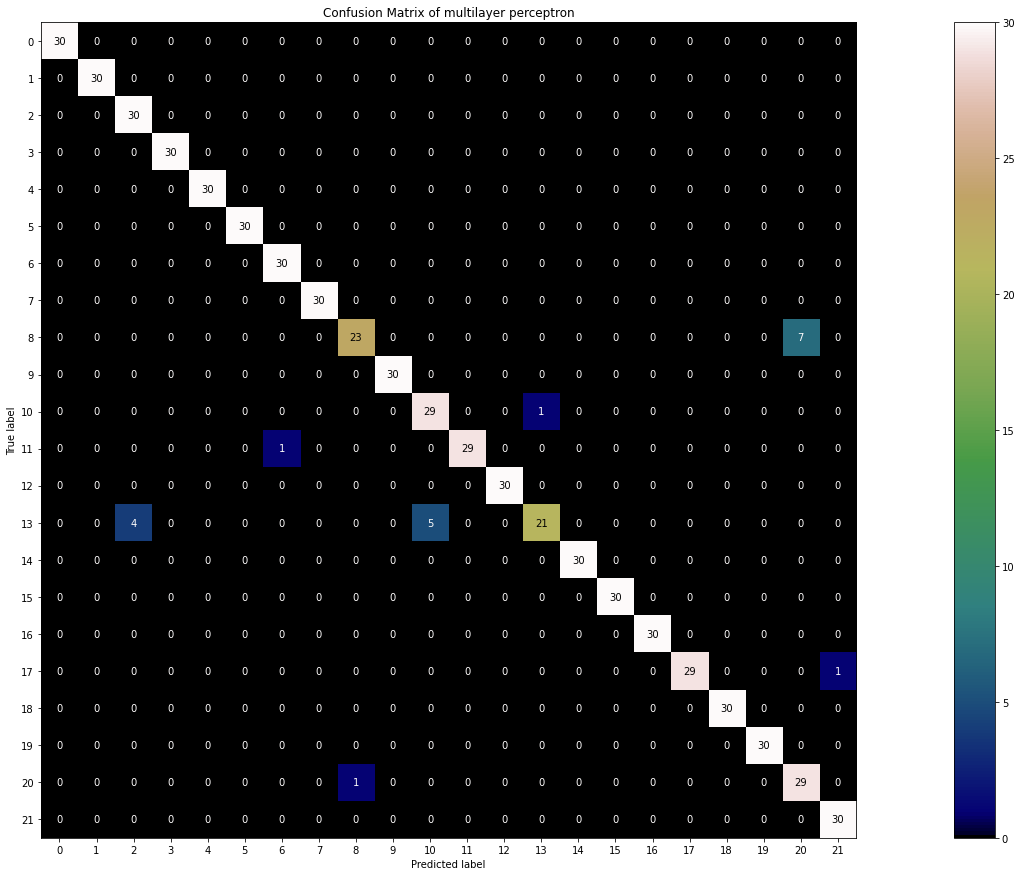

In [106]:
fig, ax = plt.subplots(figsize=(35,15))
plot_confusion_matrix(rF, X_test, y_test, ax=ax,cmap ='gist_earth')
plt.title('Confusion Matrix of multilayer perceptron')
plt.show()

#### 5.)  ADABOOST CLASSIFIER

In [107]:
Abc = AdaBoostClassifier()

In [108]:
Abc.fit(X_train,y_train)
predicted_Abc = Abc.predict(X_test)

In [109]:
Accuracy5 = accuracy_score(y_test,predicted_Abc)
print('Accuracy of AdaBoost Classifier is: ',Accuracy5*100)


Accuracy of AdaBoost Classifier is:  18.181818181818183


In [110]:
adba = Accuracy5*100
print(adba)

18.181818181818183


#### Hamming loss

In [111]:
loss = hamming_loss(y_test, predicted_Abc)
print('Error is ', loss*100)

Error is  81.81818181818183


#### crossvalidation for ada-boost classsifier

In [112]:
cvs_Abc = cross_val_score(Abc, Input,output)
print(cvs_rF)

[0.98863636 0.97727273 0.98181818 0.98409091 0.96590909]


In [113]:
print(f'Accuracy of Cross Validation Score is {cvs_Abc.mean()*100}')

Accuracy of Cross Validation Score is 20.0


#### Classification report for ada-boost 

In [114]:
cr5 = classification_report(y_test,predicted_Abc)
print(cr5)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.00      0.00      0.00        30
           2       0.06      1.00      0.11        30
           3       0.50      1.00      0.67        30
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        30
          15       1.00      1.00      1.00        30
          16       0.00      0.00      0.00        30
          17       0.00    

#### Confusion Matrix

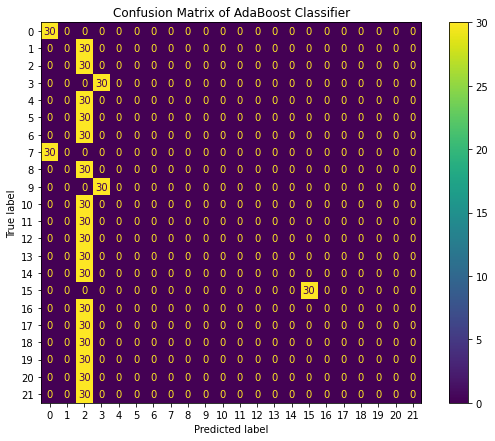

In [115]:
fig, ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(Abc, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.show()

#### 6.) GRADIENTBOOSTING CLASSIFIER

In [116]:
gBC = GradientBoostingClassifier(learning_rate=1)

In [117]:
gBC.fit(X_train,y_train)
predicted_gBC = gBC.predict(X_test)

In [118]:
Accuracy6 = accuracy_score(y_test,predicted_gBC)
print('Accuracy of Gradient Boosting Classifier is: ',Accuracy6*100)


Accuracy of Gradient Boosting Classifier is:  73.33333333333333


In [119]:
gbca = Accuracy6*100
print(gbca)

73.33333333333333


In [120]:
gbca

73.33333333333333

#### Hamming Loss

In [121]:
loss = hamming_loss(y_test, predicted_gBC)
print('Error is ', loss*100)

Error is  26.666666666666668


#### cross validation for GradientBoostingClassifier

In [122]:
cvs_gBC = cross_val_score(gBC, Input,output)
print(cvs_gBC)

[0.20454545 0.27727273 0.10227273 0.22727273 0.07954545]


In [123]:
print(f'Accuracy of Cross Validation Score is {cvs_gBC.mean()*100}')

Accuracy of Cross Validation Score is 17.81818181818182


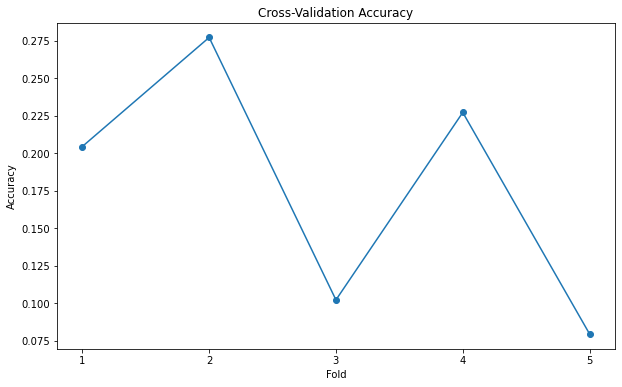

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_gBC, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### Classification Report for Gradient Boosting

In [125]:
cr6 = classification_report(y_test,predicted_gBC)
print(cr6)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.83      1.00      0.91        30
           2       0.75      0.90      0.82        30
           3       1.00      1.00      1.00        30
           4       1.00      0.20      0.33        30
           5       0.29      0.73      0.42        30
           6       1.00      0.47      0.64        30
           7       0.96      0.87      0.91        30
           8       0.75      0.10      0.18        30
           9       0.85      0.93      0.89        30
          10       0.85      0.93      0.89        30
          11       0.64      1.00      0.78        30
          12       0.91      0.97      0.94        30
          13       0.74      0.87      0.80        30
          14       0.90      0.93      0.92        30
          15       1.00      1.00      1.00        30
          16       1.00      0.33      0.50        30
          17       0.36    

#### Confusion Matrix for Gradient Boosting

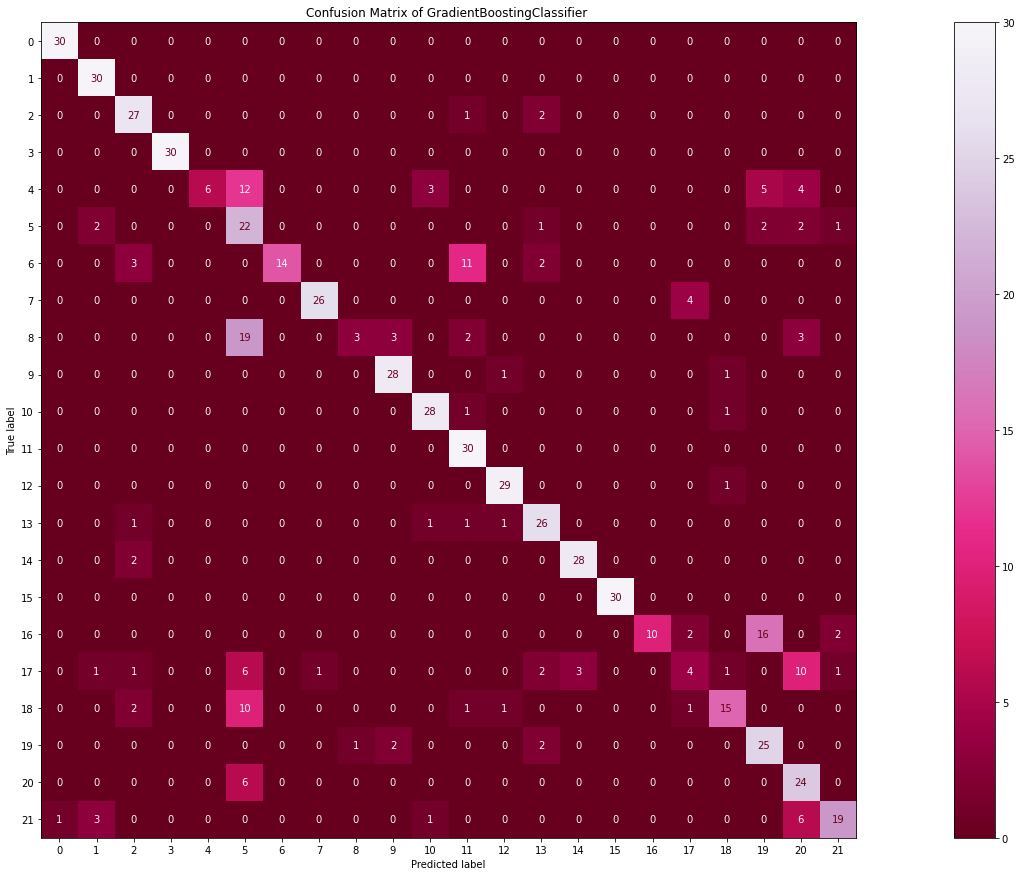

In [126]:
fig, ax = plt.subplots(figsize=(35,15))
plot_confusion_matrix(gBC, X_test, y_test, ax=ax,cmap='PuRd_r')
plt.title('Confusion Matrix of GradientBoostingClassifier ')
plt.show()

#### 7.) PASSIVEAGGRESSIVECLASSIFIER

In [127]:
pAC = PassiveAggressiveClassifier(random_state=42)

In [128]:
pAC.fit(X_train,y_train)
predicted_pAC = pAC.predict(X_test)

In [129]:
Accuracy7 = accuracy_score(y_test, predicted_pAC)
print('Accuracy of PassiveAggressiveClassifier is: ',Accuracy7*100)


Accuracy of PassiveAggressiveClassifier is:  77.42424242424242


In [130]:
paca = Accuracy7*100
print(paca)

77.42424242424242


#### Hamming Loss

In [131]:
loss = hamming_loss(y_test, predicted_pAC)
print('Error is ', loss*100)

Error is  22.575757575757578


#### Cross validation for PassiveAggressiveClassifier

In [132]:
cvs_pAC = cross_val_score(pAC, Input,output)
print(cvs_pAC)

[0.72045455 0.70909091 0.83409091 0.71363636 0.71818182]


In [133]:
print(f'Accuracy of Cross Validation Score is {cvs_pAC.mean()*100}')

Accuracy of Cross Validation Score is 73.9090909090909


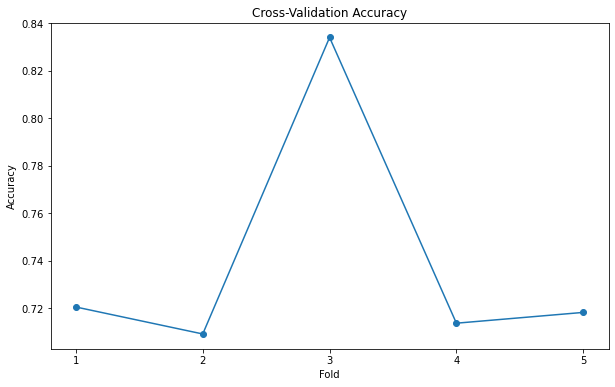

In [134]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_pAC, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### Classification report for Passive Aggressive Classifier

In [135]:
cr7 = classification_report(y_test,predicted_pAC)
print(cr7)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       0.94      0.57      0.71        30
           2       0.00      0.00      0.00        30
           3       1.00      1.00      1.00        30
           4       0.97      0.93      0.95        30
           5       1.00      0.73      0.85        30
           6       0.88      0.77      0.82        30
           7       1.00      0.77      0.87        30
           8       0.00      0.00      0.00        30
           9       1.00      0.93      0.97        30
          10       1.00      0.70      0.82        30
          11       0.47      0.90      0.61        30
          12       1.00      1.00      1.00        30
          13       0.53      0.97      0.68        30
          14       0.97      0.97      0.97        30
          15       0.91      0.97      0.94        30
          16       0.97      1.00      0.98        30
          17       0.89    

#### Confusion Matrix for Passive aggressive Classifier

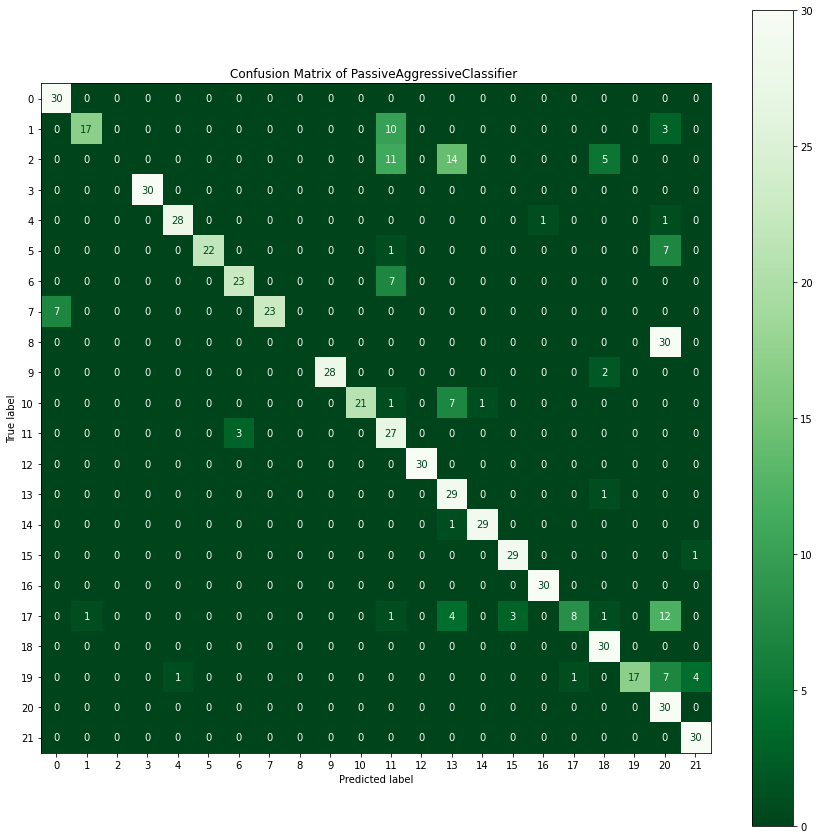

In [136]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(pAC, X_test, y_test, ax=ax,cmap = 'Greens_r')
plt.title('Confusion Matrix of PassiveAggressiveClassifier ')
plt.show()

#### 8.) RIDGECLASSIFIER

In [137]:
rC = RidgeClassifier()

In [138]:
rC.fit(X_train,y_train)
predicted_rC = rC.predict(X_test)

In [139]:
Accuracy8 = accuracy_score(y_test, predicted_rC)
print('Accuracy of RidgeClassifier is: ',Accuracy8*100)


Accuracy of RidgeClassifier is:  72.87878787878788


In [140]:
rca = Accuracy8*100
print(rca)

72.87878787878788


#### Hamming Loss

In [141]:
loss = hamming_loss(y_test, predicted_rC)
print('Error is ', loss*100)

Error is  27.121212121212125


#### Cross-validation for Ridge Classifier

In [142]:
cvs_rC = cross_val_score(rC, Input,output)
print(cvs_rC)

[0.72954545 0.725      0.725      0.725      0.70454545]


In [143]:
print(f'Accuracy of Cross Validation Score is {cvs_rC.mean()*100}')

Accuracy of Cross Validation Score is 72.18181818181819


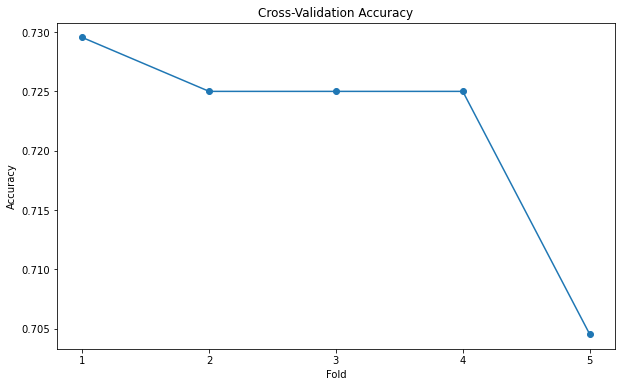

In [144]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_rC, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### classification-report for Ridge classifier

In [145]:
cr8 = classification_report(y_test,predicted_rC)
print(cr8)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.86      1.00      0.92        30
           2       0.84      0.87      0.85        30
           3       0.68      1.00      0.81        30
           4       0.94      1.00      0.97        30
           5       0.94      1.00      0.97        30
           6       0.63      0.90      0.74        30
           7       1.00      0.73      0.85        30
           8       0.00      0.00      0.00        30
           9       0.58      1.00      0.73        30
          10       0.82      0.93      0.87        30
          11       1.00      0.13      0.24        30
          12       0.69      0.97      0.81        30
          13       1.00      0.07      0.12        30
          14       0.85      0.97      0.91        30
          15       0.48      1.00      0.65        30
          16       0.90      0.63      0.75        30
          17       0.81    

#### Confusion Matrix for Ridge Classifier

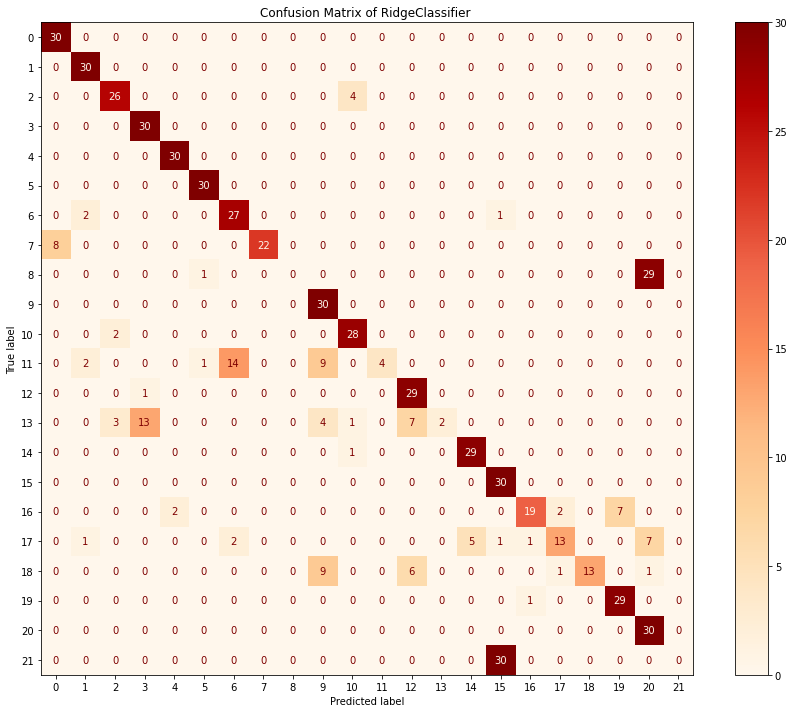

In [146]:
fig, ax = plt.subplots(figsize=(15,12))
plot_confusion_matrix(rC, X_test, y_test, ax=ax,cmap='OrRd')
plt.title('Confusion Matrix of RidgeClassifier ')
plt.show()

#### 9.) VOTING CLASSIFIER

In [147]:
vot_clf = VotingClassifier(estimators=[('DecisionTree', dt), ('NaiveBayes', nb), ('AdaBoostClassifier', Abc),('RidgeClassifier',rC),('PassiveAggressiveClassifier',pAC),('GradientBoostingClassifier',gBC),('RandomForestClassifier',rF)    ], voting='hard')

In [148]:
vot_clf.fit(X_train, y_train)
pred_vtng = vot_clf.predict(X_test)

In [149]:
Accuracy9 = accuracy_score(y_test,pred_vtng)
print('Accuracy of Voting Classifier is: ',Accuracy9*100)


Accuracy of Voting Classifier is:  96.81818181818181


In [150]:
vca = Accuracy9*100
print(vca)

96.81818181818181


#### Hamming Loss

In [151]:
loss = hamming_loss(y_test, pred_vtng)
print('Error is ', loss*100)

Error is  3.1818181818181817


#### cross validation for Voting Classifier

In [152]:
cvs_vc = cross_val_score(vot_clf, Input,output)
print(cvs_vc)

[0.97954545 0.97272727 0.98409091 0.98409091 0.96363636]


In [153]:
print(f'Accuracy of Cross Validation Score is {cvs_vc.mean()*100}')

Accuracy of Cross Validation Score is 97.68181818181819


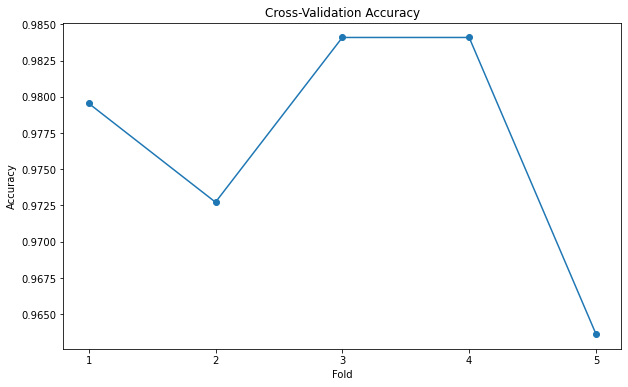

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, 6),cvs_vc, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 6))
plt.show()

#### classification report for Voting Classifier

In [155]:
cr9 = classification_report(y_test,pred_vtng)
print(cr9)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.98        30
           2       0.91      1.00      0.95        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.91      1.00      0.95        30
           7       1.00      1.00      1.00        30
           8       0.96      0.77      0.85        30
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        30
          11       1.00      0.90      0.95        30
          12       1.00      1.00      1.00        30
          13       1.00      0.87      0.93        30
          14       0.91      1.00      0.95        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

#### Confusion matrix For Voting Classifier

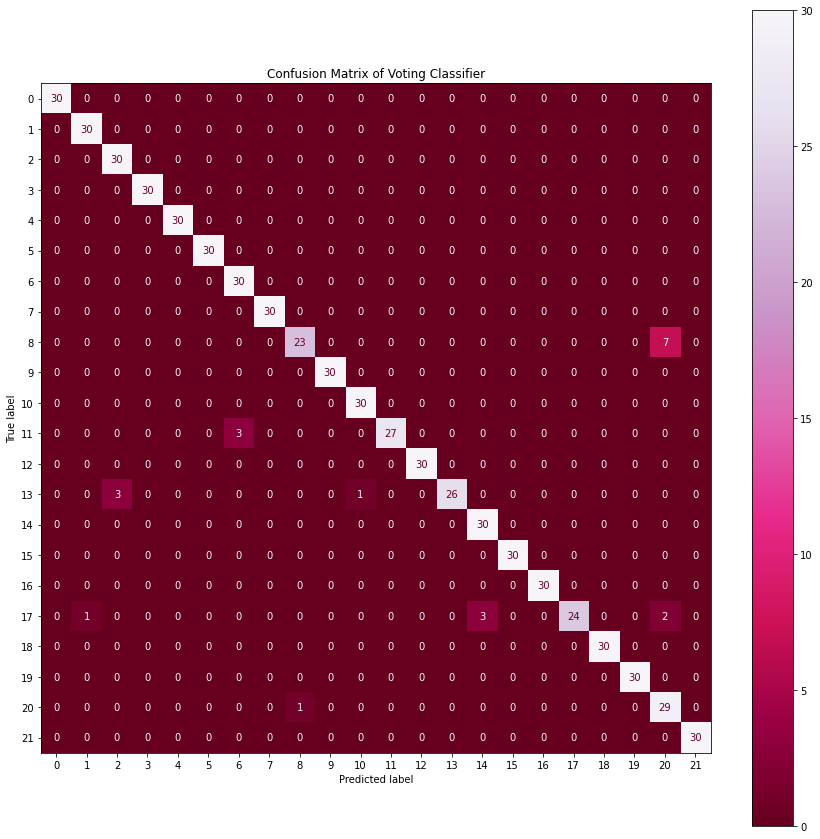

In [156]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(vot_clf, X_test, y_test, ax=ax,cmap='PuRd_r')
plt.title('Confusion Matrix of Voting Classifier')
plt.show()

### Comparing the performance of Algorithms

#### Now we have to select the best fit algorithm for our model

#### Box-Plot comparison

In [157]:
random_seed = 6

In [158]:
outcome = []
model_names = []
models = [('DecTree', DecisionTreeClassifier()), 
          ('RFC', RandomForestClassifier()), 
          ('AbC', AdaBoostClassifier()),
          ('MLP',MLPClassifier()),
          ('GnB',GaussianNB()),
         # ('VotClas',VotingClassifier()),
          ('Passagg',PassiveAggressiveClassifier()),
          ('Rc',RidgeClassifier()),
          ('Graboosting',GradientBoostingClassifier())]

In [159]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed, shuffle=True)
    results = model_selection.cross_val_score(model, Input, output, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

DecTree| Mean=0.989545 STD=0.005768
RFC| Mean=0.995000 STD=0.005909
AbC| Mean=0.137727 STD=0.030155
MLP| Mean=0.963636 STD=0.013330
GnB| Mean=0.995000 STD=0.002448
Passagg| Mean=0.725455 STD=0.094305
Rc| Mean=0.704545 STD=0.035501
Graboosting| Mean=0.991364 STD=0.007727


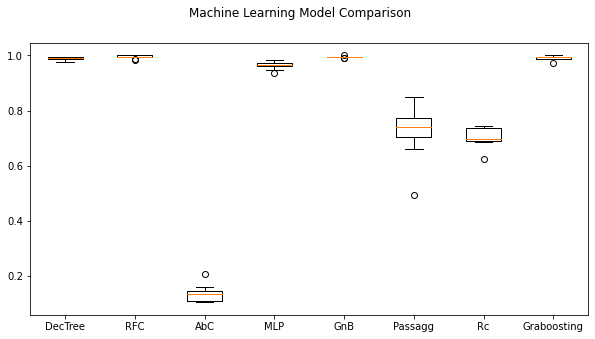

In [160]:
fig = plt.figure( figsize=(10,5))
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

#### Bar-Chart comparison

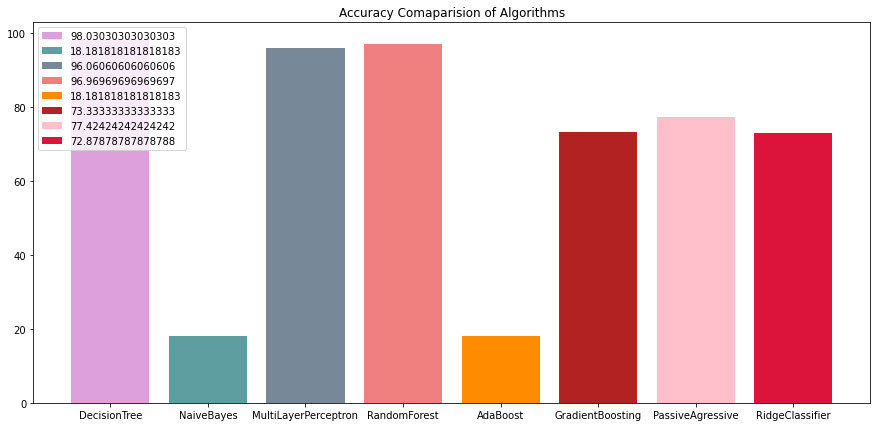

In [161]:
def compare():
    data = [dta,adba,mlpa,rfa,adba,gbca,paca,rca]
    algo = 'DecisionTree', 'NaiveBayes', 'MultiLayerPerceptron', 'RandomForest', 'AdaBoost', 'GradientBoosting', 'PassiveAgressive', 'RidgeClassifier' #'VotingClassifier'
    plt.figure(figsize=(15,7))
    col = plt.bar(algo, data, color=('plum','cadetblue','lightslategray','lightcoral','darkorange','firebrick','pink','crimson','darkcyan'))
    plt.title('Accuracy Comaparision of Algorithms')
    plt.legend(col, data, fontsize=10)
compare()

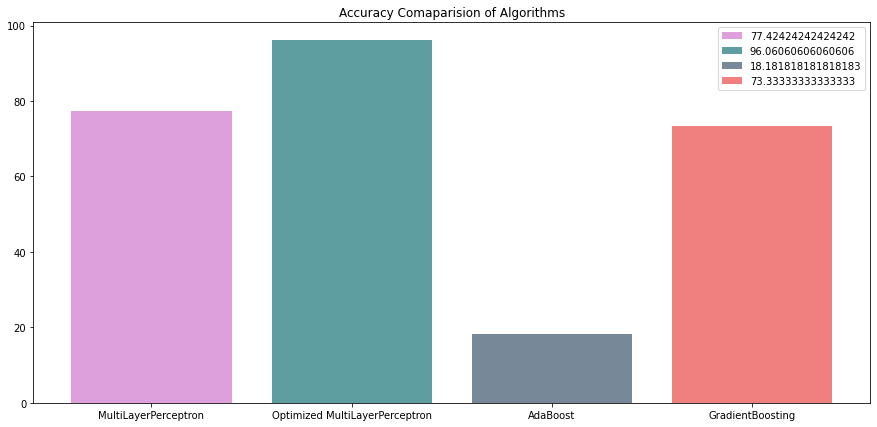

In [162]:
def compare():
    data = [paca,mlpa,adba,gbca]
    algo = 'MultiLayerPerceptron', 'Optimized MultiLayerPerceptron', 'AdaBoost', 'GradientBoosting'
    plt.figure(figsize=(15,7))
    col = plt.bar(algo, data, color=('plum','cadetblue','lightslategray','lightcoral','darkorange','firebrick','pink','crimson','darkcyan'))
    plt.title('Accuracy Comaparision of Algorithms')
    plt.legend(col, data, fontsize=10)
compare()

#### exporting our model

In [163]:
import joblib
joblib.dump(rF,'rfc,pkl')

['rfc,pkl']

In [164]:
#python manage.py runserver

In [165]:
#python manage.py createsuperuser

In [166]:
# crtl+c for closing the server